In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_goldfeldquandt

In [3]:
df = pd.read_excel(r'D:\Uni\2курс(2021-2022)\Прикладная эконометрика\Econometrics1\GDP.xlsx')

In [4]:
df.to_csv (r'D:\Uni\2курс(2021-2022)\Прикладная эконометрика\Econometrics1\GDP.csv', index = None, header=True)
df = pd.read_csv(r'D:\Uni\2курс(2021-2022)\Прикладная эконометрика\Econometrics1\GDP.csv')

In [4]:
df.head()

,Country Name,GDP,G,I,C,NX
0,Aruba,2.962905e+09,6.890425e+08,6.381786e+08,2.328514e+09,-3.787878e+06
1,Angola,1.161936e+11,1.909391e+10,3.974112e+10,8.037909e+10,-3.926557e+09
2,Albania,1.138685e+10,1.265151e+09,2.939976e+09,1.045374e+10,-1.966079e+09
3,United Arab Emirates,3.581351e+11,4.451110e+10,9.182289e+10,1.713359e+11,9.497617e+10
4,Argentina,5.947493e+11,1.076400e+11,1.015279e+11,4.996145e+11,-6.393091e+09


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 6 columns):
Country Name    174 non-null object
GDP             174 non-null float64
G               174 non-null float64
I               174 non-null float64
C               174 non-null float64
NX              174 non-null float64
dtypes: float64(5), object(1)
memory usage: 7.5+ KB


In [6]:
df.columns

Index(['Country Name', 'GDP', 'G', 'I', 'C', 'NX'], dtype='object')

In [7]:
df.isnull().sum()

Country Name    0
GDP             0
G               0
I               0
C               0
NX              0
dtype: int64

In [8]:
df.describe()

,GDP,G,I,C,NX
count,1.740000e+02,1.740000e+02,1.740000e+02,1.740000e+02,1.740000e+02
mean,4.253796e+11,7.102220e+10,1.098710e+11,3.124866e+11,3.017540e+09
std,1.696817e+12,2.620425e+11,4.791630e+11,1.278875e+12,5.631263e+10
min,1.711178e+08,9.315424e+07,-2.391389e+06,2.413387e+08,-5.261990e+11
25%,1.132606e+10,1.625348e+09,2.363700e+09,8.603497e+09,-2.766090e+09
50%,4.407774e+10,5.797708e+09,8.992678e+09,3.280683e+10,-5.584149e+08
75%,1.984664e+11,3.246034e+10,5.326655e+10,1.510355e+11,1.433446e+09
max,1.823830e+13,2.608983e+12,4.782441e+12,1.487246e+13,3.588357e+11


<Figure size 1152x864 with 0 Axes>

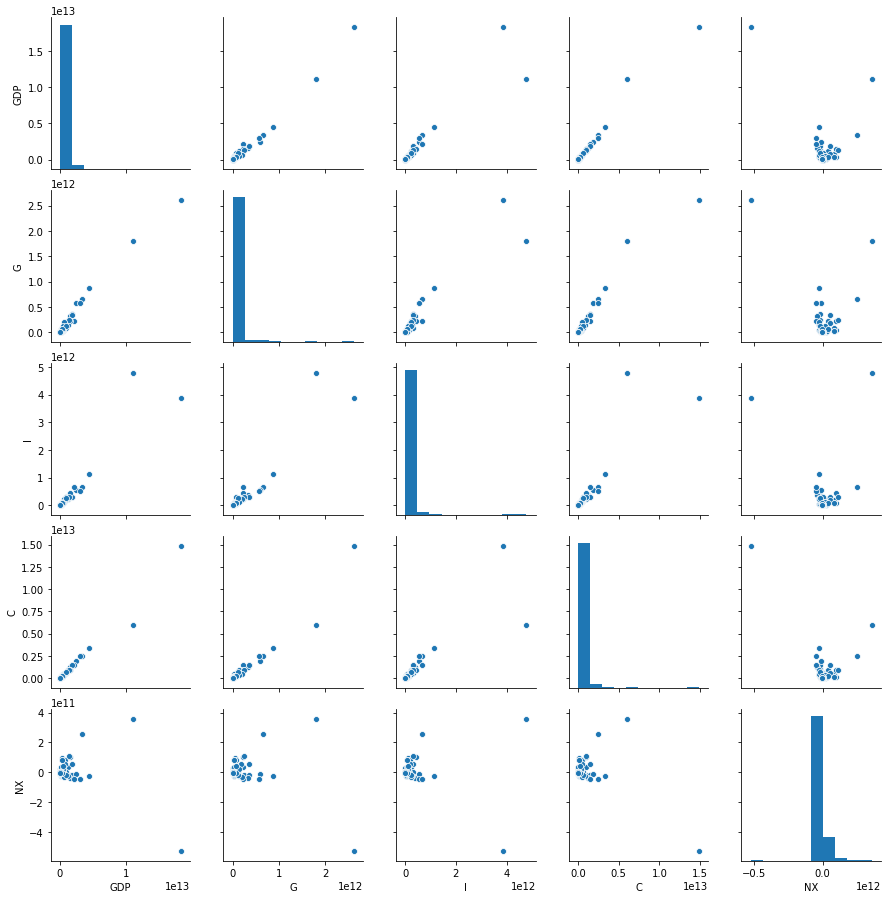

In [9]:
plt.figure(figsize=(16,12))
sns.pairplot(df)
plt.show()

In [5]:
df_new = df.drop(['Country Name'], axis=1) 

In [11]:
df_new.columns

Index(['GDP', 'G', 'I', 'C', 'NX'], dtype='object')

In [12]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 5 columns):
GDP    174 non-null float64
G      174 non-null float64
I      174 non-null float64
C      174 non-null float64
NX     174 non-null float64
dtypes: float64(5)
memory usage: 6.8 KB


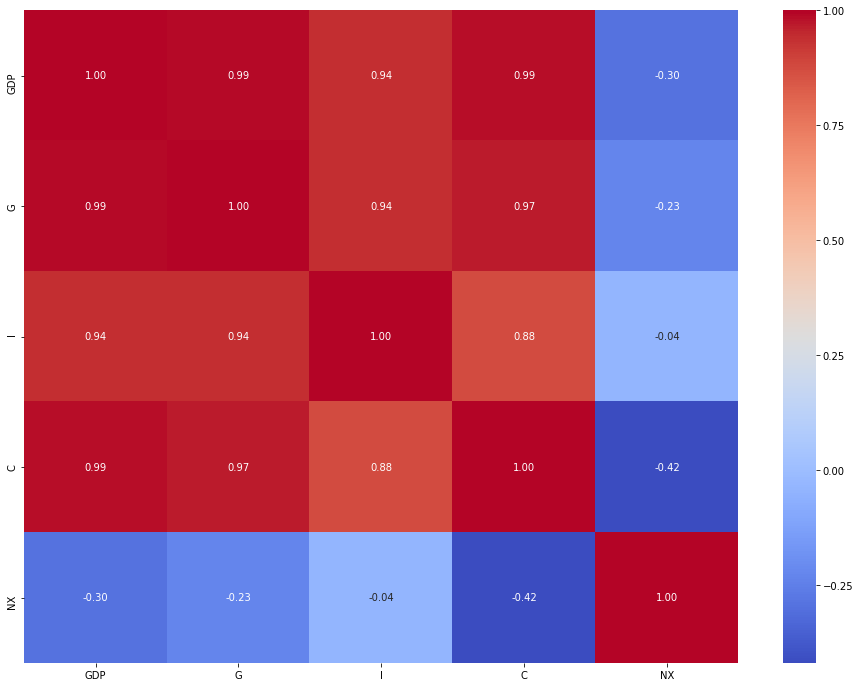

In [13]:
plt.figure(figsize=(16,12))
sns.heatmap(data=df_new.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [35]:
y = df_new['GDP']
x = df_new['C']
x = sm.add_constant(x)

model = sm.OLS(y, x) 
result = model.fit()
result.summary()

c:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GDP   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     6753.
Date:                Fri, 17 Jun 2022   Prob (F-statistic):          5.90e-140
Time:                        02:14:53   Log-Likelihood:                -4824.7
No. Observations:                 174   AIC:                             9653.
Df Residuals:                     172   BIC:                             9660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.595e+10   2.09e+10      0.762      0.447   -2.54e+10    5.73e+10
C              1.3102      0.016     82.174      0.000       1.279       1.342
==============================================================================
Omnibus:                      327.433   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           110912.300
Skew:                           9.510   Prob(JB):                         0.00
Kurtosis:                     125.215   Cond. No.                     1.35e+12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
result.params

const    1.595265e+10
C        1.310222e+00
dtype: float64

In [37]:
y = df_new['GDP']
x = df_new[['C',
        'I']]
x = sm.add_constant(x)

model = sm.OLS(y, x) 
result = model.fit()
result.summary()

c:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GDP   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.232e+05
Date:                Fri, 17 Jun 2022   Prob (F-statistic):          7.16e-293
Time:                        02:16:46   Log-Likelihood:                -4461.7
No. Observations:                 174   AIC:                             8929.
Df Residuals:                     171   BIC:                             8939.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.504e+09   2.61e+09      2.877      0.005    2.36e+09    1.27e+10
C              0.9344      0.004    227.462      0.000       0.926       0.943
I              1.1458      0.011    104.506      0.000       1.124       1.167
==============================================================================
Omnibus:                      232.865   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15193.624
Skew:                           5.486   Prob(JB):                         0.00
Kurtosis:                      47.444   Cond. No.                     1.43e+12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
y = df_new['GDP']
x = df_new[['C',
        'I', 
        'G',]]
x = sm.add_constant(x)

model = sm.OLS(y, x) 
result = model.fit()
result.summary()

c:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GDP   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.188e+05
Date:                Fri, 17 Jun 2022   Prob (F-statistic):          1.35e-304
Time:                        02:21:32   Log-Likelihood:                -4427.6
No. Observations:                 174   AIC:                             8863.
Df Residuals:                     170   BIC:                             8876.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.836e+09   2.19e+09      1.753      0.081   -4.84e+08    8.16e+09
C              0.8688      0.008    108.294      0.000       0.853       0.885
I              1.0379      0.015     69.229      0.000       1.008       1.067
G              0.5074      0.056      9.026      0.000       0.396       0.618
==============================================================================
Omnibus:                      162.327   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4048.212
Skew:                           3.297   Prob(JB):                         0.00
Kurtosis:                      25.691   Cond. No.                     1.48e+12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
result.params

const    3.836500e+09
C        8.687591e-01
I        1.037867e+00
G        5.073927e-01
dtype: float64

In [38]:
result.params

const    7.504301e+09
C        9.343925e-01
I        1.145800e+00
dtype: float64

In [10]:
y = df_new['GDP']
x = df_new[['C',
        'I', 
        'G',
        'NX']]
x = sm.add_constant(x)

model = sm.OLS(y, x) 
result = model.fit()
result.summary()

c:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GDP   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.178e+07
Date:                Fri, 17 Jun 2022   Prob (F-statistic):               0.00
Time:                        12:00:56   Log-Likelihood:                -4001.9
No. Observations:                 174   AIC:                             8014.
Df Residuals:                     169   BIC:                             8030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.825e+08   1.92e+08      0.952      0.342   -1.96e+08    5.61e+08
C              1.0087      0.001    864.981      0.000       1.006       1.011
I              0.9873      0.001    734.238      0.000       0.985       0.990
G             -0.0206      0.006     -3.426      0.001      -0.033      -0.009
NX             0.9874      0.007    149.617      0.000       0.974       1.000
==============================================================================
Omnibus:                       97.785   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3006.128
Skew:                           1.399   Prob(JB):                         0.00
Kurtosis:                      23.170   Cond. No.                     1.49e+12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
result.params

const    1.824657e+08
C        1.008700e+00
I        9.873191e-01
G       -2.063188e-02
NX       9.874418e-01
dtype: float64

In [23]:
result.model.exog_names[1:]

['C', 'I', 'G', 'NX']

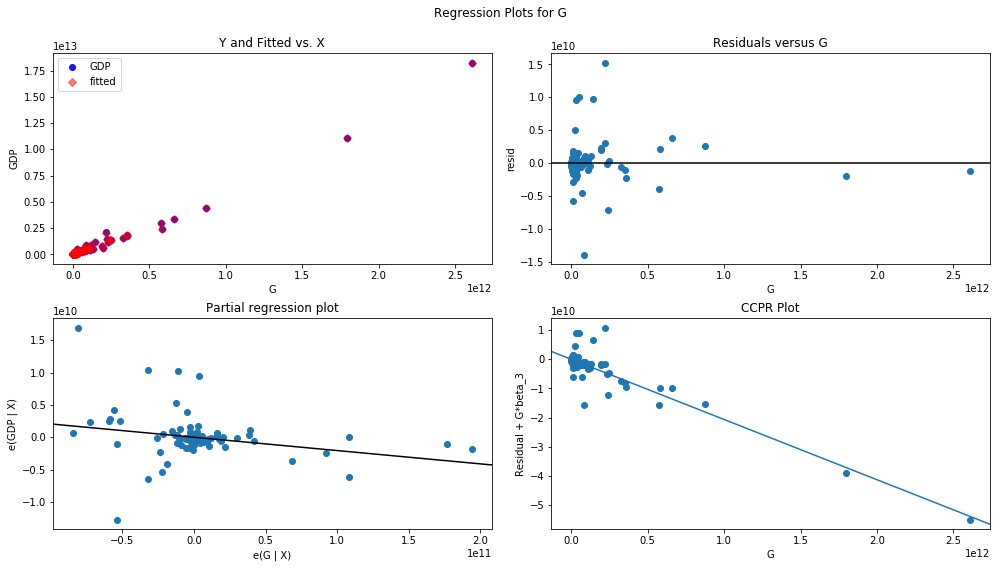

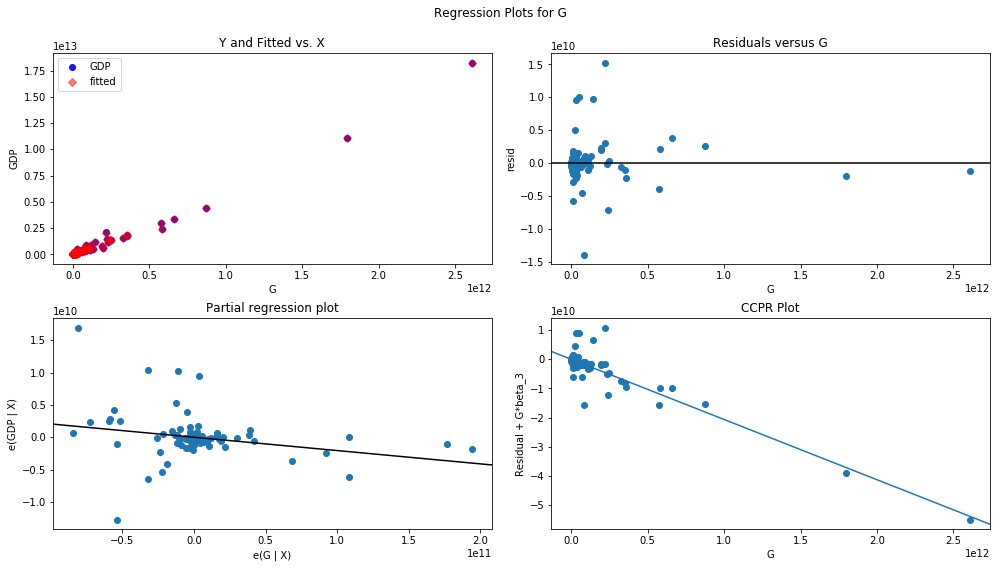

In [25]:
fig = plt.figure(figsize=(14, 8))
sm.graphics.plot_regress_exog(result, 'G', fig=fig)

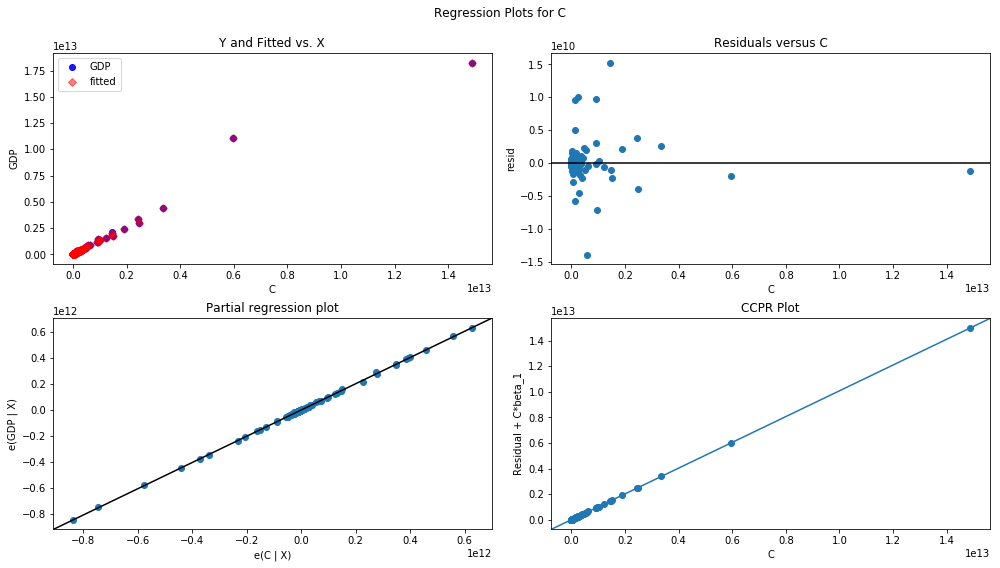

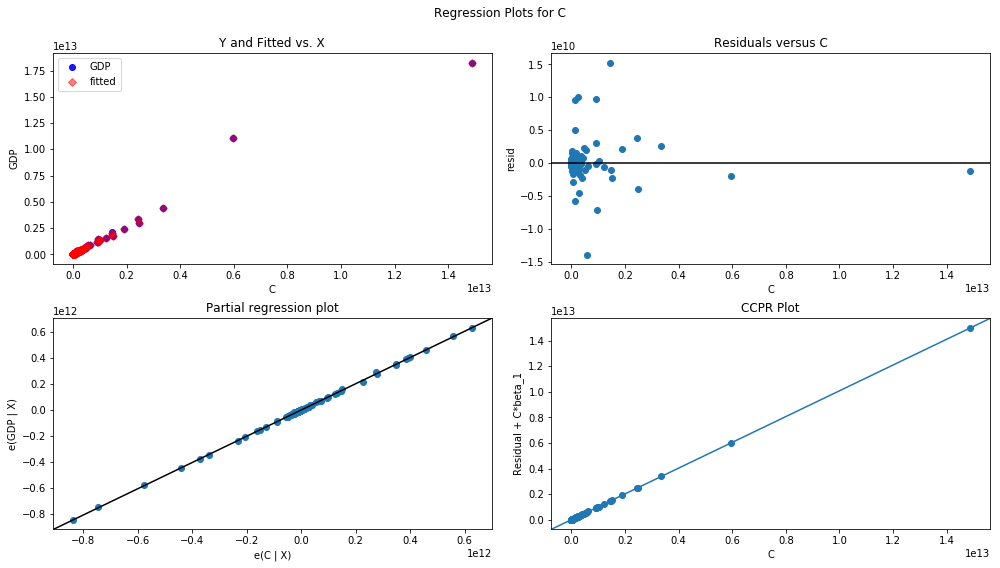

In [26]:
fig = plt.figure(figsize=(14, 8))
sm.graphics.plot_regress_exog(result, 'C', fig=fig)

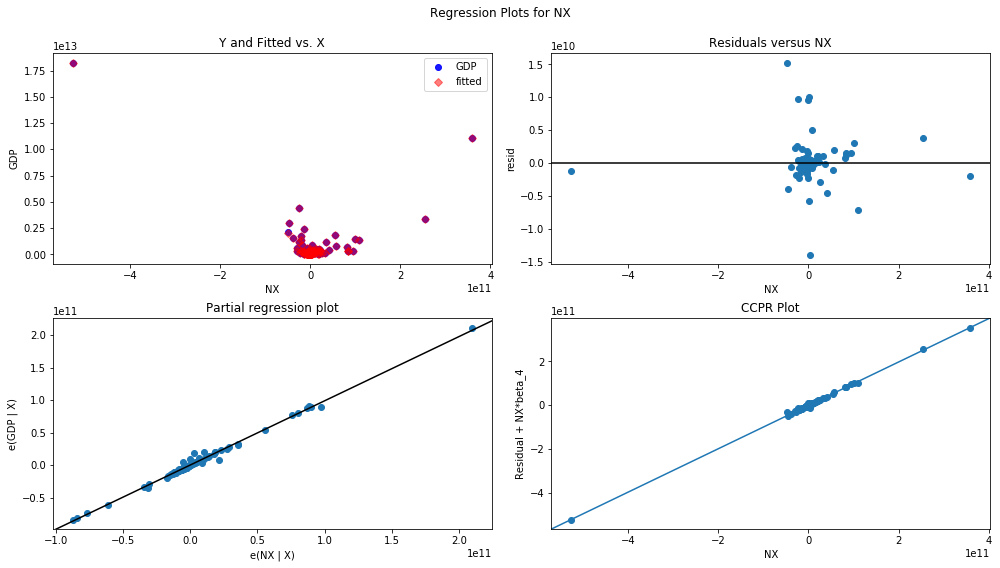

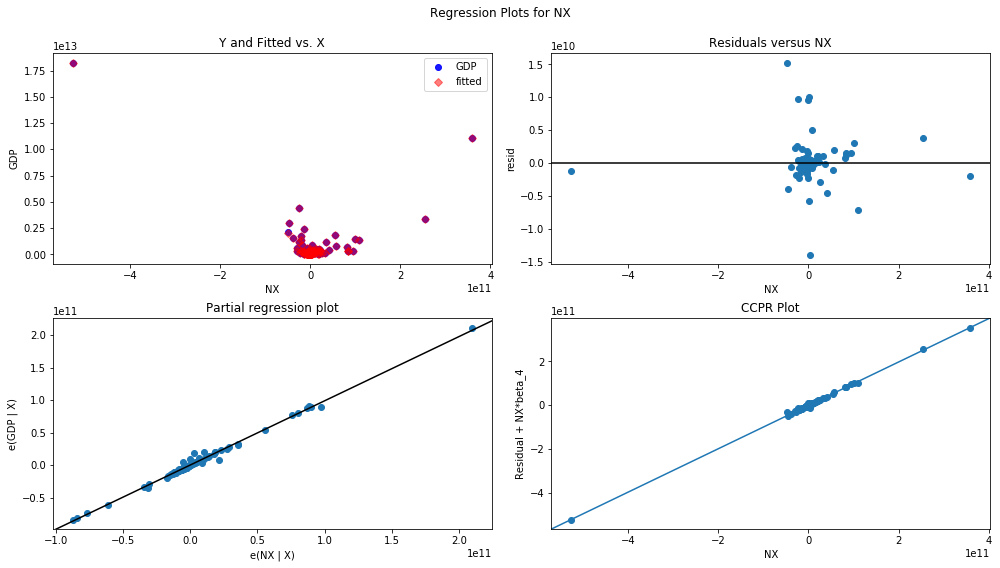

In [27]:
fig = plt.figure(figsize=(14, 8))
sm.graphics.plot_regress_exog(result, 'NX', fig=fig)

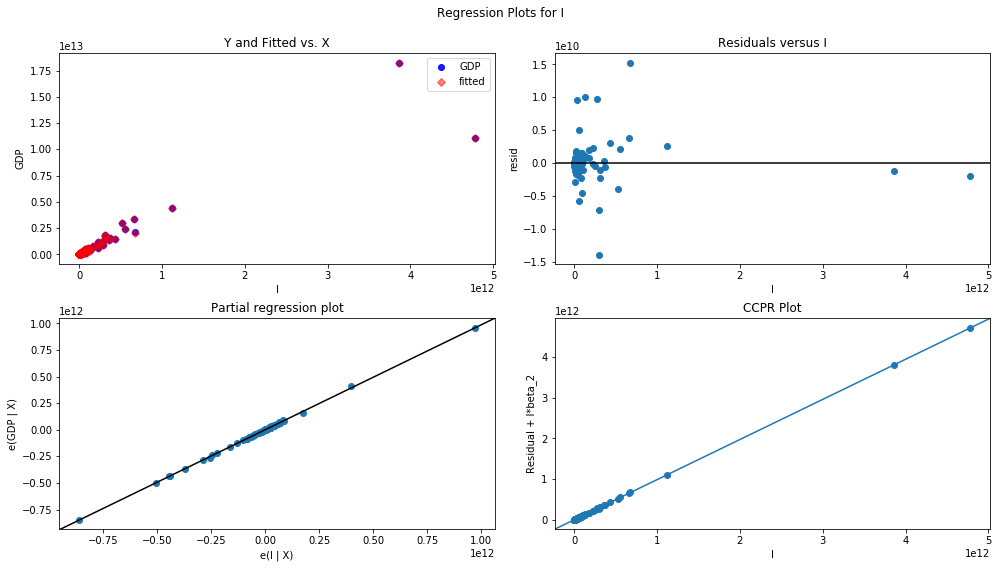

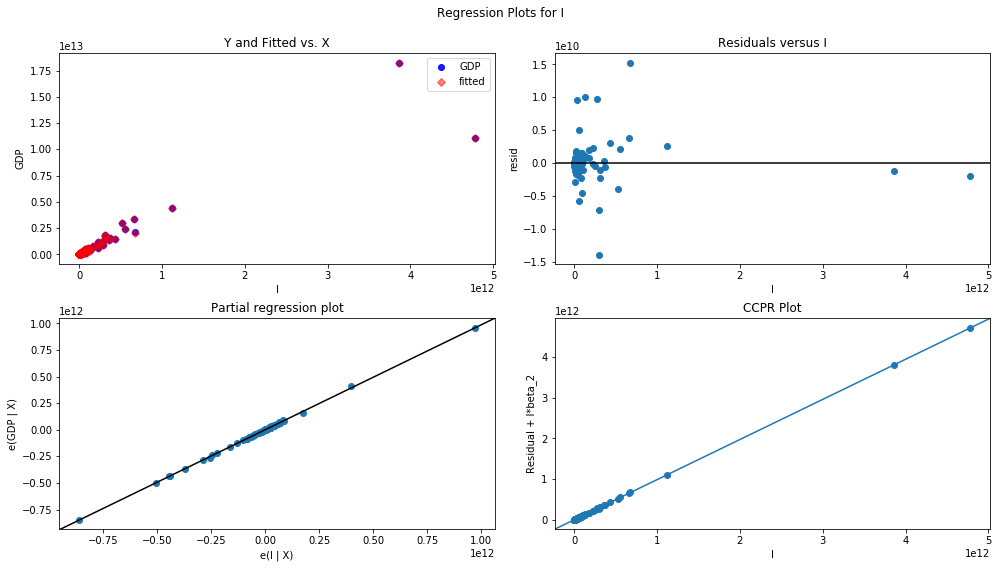

In [28]:
fig = plt.figure(figsize=(14, 8))
sm.graphics.plot_regress_exog(result, 'I', fig=fig)

In [24]:
het_goldfeldquandt(result.model.endog, result.model.exog)

(0.32779603227844467, 0.9999995514219421, 'increasing')

In [30]:
vif = [variance_inflation_factor(x.values, x.columns.get_loc(i)) for i in x.columns[1:]]

In [31]:
x.columns

Index(['const', 'C', 'I', 'G', 'NX'], dtype='object')

In [32]:
vif

[67.30497832133481, 12.562858838293062, 75.37731478278015, 4.179791040387723]

(array([  1.,   0.,   2.,   4., 145.,  16.,   2.,   0.,   3.,   1.]),
 array([-1.38842816e+10, -1.09705913e+10, -8.05690109e+09, -5.14321086e+09,
        -2.22952062e+09,  6.84169624e+08,  3.59785986e+09,  6.51155010e+09,
         9.42524034e+09,  1.23389306e+10,  1.52526208e+10]),
 <a list of 10 Patch objects>)

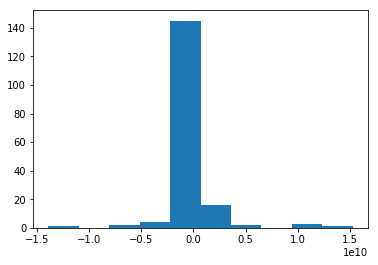

In [13]:
plt.hist(result.resid)

In [6]:
df_new.corr()

,GDP,G,I,C,NX
GDP,1.000000,0.990667,0.940085,0.987502,-0.295852
G,0.990667,1.000000,0.941646,0.971829,-0.229346
I,0.940085,0.941646,1.000000,0.875442,-0.038910
C,0.987502,0.971829,0.875442,1.000000,-0.418949
NX,-0.295852,-0.229346,-0.038910,-0.418949,1.000000


In [25]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white

In [32]:
het_breuschpagan(result.resid, result.model.exog)

(12.156696897720716,
 0.016223283130363017,
 3.1735662463840715,
 0.015176595442447469)